# U.S. Medical Insurance Costs

####  In this project, I utilize Python fundamentals to investigate medical insurance costs saved in a CSV file. The goal of this study is to analyze various attributes within the CSV file saved as insurance.csv in order to know more about the patient information stored in the file and to gain insight about the dataset.

#### The current study comprises three distinct parts. Firstly, an analysis function was developed. Secondly, an alternative approach to analyzing the data was proposed through the creation of a class method. Finally, the data were visualized to enhance the understanding of the relationship between the variables under investigation.

In [202]:
#start by importing the important library
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [203]:
#To quickly see the columns and how the data appears
df = pd.read_csv("insurance.csv")
df.shape



(1338, 7)

In [204]:
#Creating empty list for Saving the features of my dataset (the columns) having seen the column name in previous line
ages = []  # the age of the individual, in years
sexes = [] # "male" or "female" which is the gender of the individual in the file
bmis = []  # The body mass index (BMI) of the individual, calculated as weight (in kg) divided by height (in meters) squared
num_children = [] #Number of children of each individual
smoker_status = [] #Individual smoking status
regions = [] #Individual region
insurance_charges = [] #Individual insurance charge

In [205]:
#opening the file using with
with open("insurance.csv") as insurance_file:
    insurance_records = csv.DictReader(insurance_file) #insurance_records now in dictionary mode 
    for row in insurance_records: 
        ages.append(int(row["age"]))#takes out all ages and store as list in ages
        sexes.append(row["sex"]) #takes out all sex and store as list in sex_status
        bmis.append(float(row["bmi"])) #takes out all bmi and store as list in bmis
        num_children.append(row["children"])
        if (row["smoker"] == "yes"):
            smoker_status.append(1)
        else:
            smoker_status.append(0)
        regions.append(row["region"])
        insurance_charges.append(float(row["charges"]))

# First way of analysing this data is to Build out analysis functions as seen in the cells below.

In [206]:
## function to calculate average patient age in insurance.csv

def average_patient_age(ages):
    total_age = 0
    for age in ages:
        total_age += age
        total_age_average = total_age/len(ages)    
    return ("The Average Patient Age: " + str(round(total_age_average, 2)) + " years") 
    

In [207]:
average_patient_age(ages)

'The Average Patient Age: 39.21 years'

In [208]:
## function that calculate the number of male and female in the insurance.csv file
def sex_analysis(sexes):
    total_male = 0
    total_female = 0
    for sex in sexes:
        if sex == "male":
            total_male += 1
        elif sex == "female":
            total_female += 1
    return "The total male in insurance file is : " +  str(total_male) + ".", "While the total female in insurance file is : " + str(total_female) + "."

In [209]:
sex_analysis(sexes)

('The total male in insurance file is : 676.',
 'While the total female in insurance file is : 662.')

In [210]:
## function to obtain each unique region from the file
def unique_region(regions):
    unique_region = []
    for region in regions:
        if region not in unique_region:
            unique_region.append(region)
    return unique_region
            

In [211]:
unique_region(regions)

['southwest', 'southeast', 'northwest', 'northeast']

In [212]:
# A function to obtain average yearly medical charges for patients in insurance.csv
def average_yearly_charges(insurance_charges):
    total_charges = 0
    for charge in insurance_charges:
        total_charges += charge
        average_charges = total_charges / len(insurance_charges)
    return  "The average yearly charges is: " + "$" + str(round(average_charges, 2)) 
        

In [213]:
average_yearly_charges(insurance_charges)

'The average yearly charges is: $13270.42'

In [214]:
# Function to calculate cost difference between smokers and non-smokers
def insurance_cost_difference(smoker_status):
    total_smoker = 0
    total_smoker_charges = 0
    total_non_smoker = 0
    total_non_smoker_charges = 0
    for ii in range(len(smoker_status)):
        if smoker_status[ii] == 1:
            total_smoker += 1 
            total_smoker_charges += insurance_charges[ii]
        else:
            total_non_smoker += 1 
            total_non_smoker_charges += insurance_charges[ii]
    Average_smoker_charges = round(total_smoker_charges/total_smoker, 2)
    Average_non_smoker_charges = round(total_non_smoker_charges/total_non_smoker, 2)
        
    return "From the insurance list, the total smokers are {}, while non smokers are {}.  Cost difference between smokers to non smokers is {} vs {}.".format(total_smoker, total_non_smoker, Average_smoker_charges, Average_non_smoker_charges)

In [215]:
insurance_cost_difference(smoker_status)

'From the insurance list, the total smokers are 274, while non smokers are 1064.  Cost difference between smokers to non smokers is 32050.23 vs 8434.27.'

In [216]:
# A function to calculate fine average BMI of the patients
def average_bmis(bmis):
    total_bmi = 0
    average_bmi = 0
    for bmi in bmis:
      total_bmi += float(bmi) 
      average_bmi = total_bmi/len(bmis)
    return ("Average BMI: " + str(round(average_bmi, 2)))    

In [217]:
average_bmis(bmis)

'Average BMI: 30.66'

In [218]:
# A function to find highest region and value of where a patient comes from.

def most_patient_region(regions):
    """Find the highest region of patients."""
    max_frequency = {}
    for ii in regions:
        if ii in max_frequency:
            max_frequency[ii] +=1
        else:
            max_frequency[ii] = 1
    max_num = 0
    max_region = ' '
    for jj in max_frequency:
        if max_frequency[jj] > max_num:
            max_num = max_frequency[jj]
            max_region = jj
    return "{} region has the most represented patients with total number of {}".format(max_region, str(max_num))               

In [219]:
most_patient_region(regions)

'southeast region has the most represented patients with total number of 364'

In [220]:
# A function to create dictionary with all patients records
def create_dictionary():
    patients_dictionary = {}
    patients_dictionary["age"] = [int(age) for age in ages]
    patients_dictionary["sex"] = sexes
    patients_dictionary["bmi"] = bmis
    patients_dictionary["children"] = num_children
    patients_dictionary["smoker"] = smoker_status
    patients_dictionary["regions"] = regions
    patients_dictionary["charges"] = insurance_charges
    return patients_dictionary

In [221]:
create_dictionary()

{'age': [19,
  18,
  28,
  33,
  32,
  31,
  46,
  37,
  37,
  60,
  25,
  62,
  23,
  56,
  27,
  19,
  52,
  23,
  56,
  30,
  60,
  30,
  18,
  34,
  37,
  59,
  63,
  55,
  23,
  31,
  22,
  18,
  19,
  63,
  28,
  19,
  62,
  26,
  35,
  60,
  24,
  31,
  41,
  37,
  38,
  55,
  18,
  28,
  60,
  36,
  18,
  21,
  48,
  36,
  40,
  58,
  58,
  18,
  53,
  34,
  43,
  25,
  64,
  28,
  20,
  19,
  61,
  40,
  40,
  28,
  27,
  31,
  53,
  58,
  44,
  57,
  29,
  21,
  22,
  41,
  31,
  45,
  22,
  48,
  37,
  45,
  57,
  56,
  46,
  55,
  21,
  53,
  59,
  35,
  64,
  28,
  54,
  55,
  56,
  38,
  41,
  30,
  18,
  61,
  34,
  20,
  19,
  26,
  29,
  63,
  54,
  55,
  37,
  21,
  52,
  60,
  58,
  29,
  49,
  37,
  44,
  18,
  20,
  44,
  47,
  26,
  19,
  52,
  32,
  38,
  59,
  61,
  53,
  19,
  20,
  22,
  19,
  22,
  54,
  22,
  34,
  26,
  34,
  29,
  30,
  29,
  46,
  51,
  53,
  19,
  35,
  48,
  32,
  42,
  40,
  44,
  48,
  18,
  30,
  50,
  42,
  18,
  54,
  32,
  37,
  4

# Second way or option of analysing the data is using CLASS that contains methods from the option analysed earlier.

In [222]:
class Patients_records:
    # init method that takes in each parameters listed above
    def __init__(lista, patients_ages, patients_sexes, patients_bmis, patients_num_children, 
                 patients_smoker_status, patients_regions, patients_charges):
        lista.patients_ages = patients_ages
        lista.patients_sexes = patients_sexes
        lista.patients_bmis = patients_bmis
        lista.patients_num_children = patients_num_children
        lista.patients_smoker_status = patients_smoker_status
        lista.patients_regions = patients_regions
        lista.patients_charges = patients_charges
        
    #function to calculate average patient age in insurance.csv"
    def average_patient_age(lista):
        total_age = 0
        for age in lista.patients_ages:
            total_age += age
            total_age_average = total_age/len(lista.patients_ages)    
        return ("The Average Patient Age: " + str(round(total_age_average, 2)) + " years") 
    
    ## function that calculate the number of male and female in the insurance.csv file
    def sex_analysis(lista):
        total_male = 0
        total_female = 0
        for sex in lista.patients_sexes:
            if sex == "male":
                total_male += 1
            elif sex == "female":
                total_female += 1
        return "The total male in insurance file is : " +  str(total_male) + ".", "While the total female in insurance file is : " + str(total_female) + "."
    
    ## function to obtain each unique region from the file
    def unique_region(lista):
        unique_region = []
        for region in lista.patients_regions:
            if region not in unique_region:
                unique_region.append(region)
        return unique_region
    
    # A function to obtain average yearly medical charges for patients in insurance.csv
    def average_yearly_charges(lista):
        total_charges = 0
        for charge in lista.patients_charges:
            total_charges += charge
            average_charges = total_charges / len(lista.patients_charges)
        return  "The average yearly charges is: " + "$" + str(round(average_charges, 2)) 
    
    # Function to calculate cost difference between smokers and non-smokers
    def insurance_cost_difference(lista):
        total_smoker = 0
        total_smoker_charges = 0
        total_non_smoker = 0
        total_non_smoker_charges = 0
        for ii in range(len(lista.patients_smoker_status)):
            if lista.patients_smoker_status[ii] == 1:
                total_smoker += 1 
                total_smoker_charges += lista.patients_charges[ii]
            else:
                total_non_smoker += 1 
                total_non_smoker_charges += lista.patients_charges[ii]
        Average_smoker_charges = round(total_smoker_charges/total_smoker, 2)
        Average_non_smoker_charges = round(total_non_smoker_charges/total_non_smoker, 2)
        
        return "From the insurance list, the total smokers are {}, while non smokers are {}.  Cost difference between smokers to non smokers is {} vs {}.".format(total_smoker, total_non_smoker, Average_smoker_charges, Average_non_smoker_charges)
    
    
     # A function to calculate fine average BMI of the patients
    def average_bmis(lista):
        total_bmi = 0
        average_bmi = 0
        for bmi in lista.patients_bmis:
          total_bmi += float(bmi) 
          average_bmi = total_bmi/len(lista.patients_bmis)
        return ("Average BMI: " + str(round(average_bmi, 2)))  
    
    # A function to find highest region and value of where a patient comes from.

    def most_patient_region(lista):
        """Find the highest region of patients."""
        max_frequency = {}
        for ii in lista.patients_regions:
            if ii in max_frequency:
                max_frequency[ii] +=1
            else:
                max_frequency[ii] = 1
        max_num = 0
        max_region = ' '
        for jj in max_frequency:
            if max_frequency[jj] > max_num:
                max_num = max_frequency[jj]
                max_region = jj
        return "{} region has the most represented patients with total number of {}".format(max_region, str(max_num))
    
    
    # A function to create dictionary with all patients records
    def create_dictionary(lista):
        lista.patients_dictionary = {}
        lista.patients_dictionary["age"] = [int(age) for age in lista.patients_ages]
        lista.patients_dictionary["sex"] = lista.patients_sexes
        lista.patients_dictionary["bmi"] = lista.patients_bmis
        lista.patients_dictionary["children"] = lista.patients_num_children
        lista.patients_dictionary["smoker"] = lista.patients_smoker_status
        lista.patients_dictionary["regions"] = lista.patients_regions
        lista.patients_dictionary["charges"] = lista.patients_charges
        return lista.patients_dictionary

## Find a way to call the methods in the Patients_records class

In [223]:
patient_info = Patients_records(ages, sexes, bmis, num_children, smoker_status, regions, insurance_charges)

In [224]:
patient_info.average_patient_age()

'The Average Patient Age: 39.21 years'

In [225]:
patient_info.sex_analysis()

('The total male in insurance file is : 676.',
 'While the total female in insurance file is : 662.')

In [226]:
patient_info.unique_region()

['southwest', 'southeast', 'northwest', 'northeast']

In [227]:
patient_info.average_yearly_charges()

'The average yearly charges is: $13270.42'

In [228]:
patient_info.insurance_cost_difference()

'From the insurance list, the total smokers are 274, while non smokers are 1064.  Cost difference between smokers to non smokers is 32050.23 vs 8434.27.'

In [229]:
patient_info.average_bmis()

'Average BMI: 30.66'

In [230]:
patient_info.most_patient_region()

'southeast region has the most represented patients with total number of 364'

In [231]:
patient_info.create_dictionary()

{'age': [19,
  18,
  28,
  33,
  32,
  31,
  46,
  37,
  37,
  60,
  25,
  62,
  23,
  56,
  27,
  19,
  52,
  23,
  56,
  30,
  60,
  30,
  18,
  34,
  37,
  59,
  63,
  55,
  23,
  31,
  22,
  18,
  19,
  63,
  28,
  19,
  62,
  26,
  35,
  60,
  24,
  31,
  41,
  37,
  38,
  55,
  18,
  28,
  60,
  36,
  18,
  21,
  48,
  36,
  40,
  58,
  58,
  18,
  53,
  34,
  43,
  25,
  64,
  28,
  20,
  19,
  61,
  40,
  40,
  28,
  27,
  31,
  53,
  58,
  44,
  57,
  29,
  21,
  22,
  41,
  31,
  45,
  22,
  48,
  37,
  45,
  57,
  56,
  46,
  55,
  21,
  53,
  59,
  35,
  64,
  28,
  54,
  55,
  56,
  38,
  41,
  30,
  18,
  61,
  34,
  20,
  19,
  26,
  29,
  63,
  54,
  55,
  37,
  21,
  52,
  60,
  58,
  29,
  49,
  37,
  44,
  18,
  20,
  44,
  47,
  26,
  19,
  52,
  32,
  38,
  59,
  61,
  53,
  19,
  20,
  22,
  19,
  22,
  54,
  22,
  34,
  26,
  34,
  29,
  30,
  29,
  46,
  51,
  53,
  19,
  35,
  48,
  32,
  42,
  40,
  44,
  48,
  18,
  30,
  50,
  42,
  18,
  54,
  32,
  37,
  4

# Data Visualization

 # Figure 1. Showing the age count.

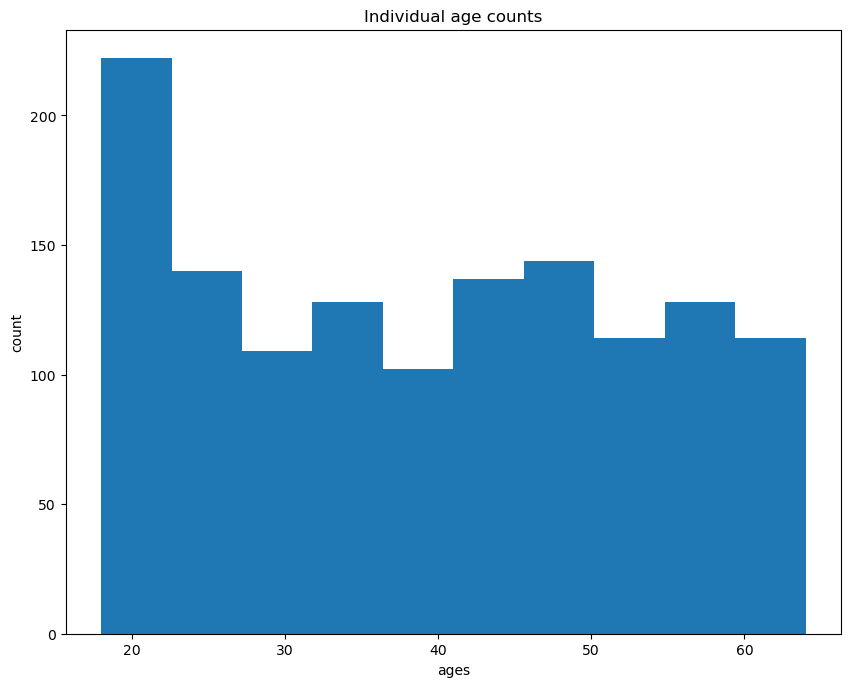

In [232]:
# Histogram showing the age count in the analysis
plt.hist(ages)
# Add labels and title
plt.xlabel('ages')
plt.ylabel('count')
plt.title('Individual age counts')
# Show plot
plt.show()


 ### Observation 1: Based on our analysis, the age range of patients in the insurance record is observed to be between 18 and 65 years. The results of our analysis indicate that the majority of individuals fall within the age range of 18 to 22 years, as well as 40 to 50 years. It was observed that the histogram of the data is positively skewed to the right. Thus, we can conclude that a larger proportion of the population belongs to the younger age categories of 20s and 30s as opposed to those in their 60s.

# Figure 2. Showing the histogram of data by regions

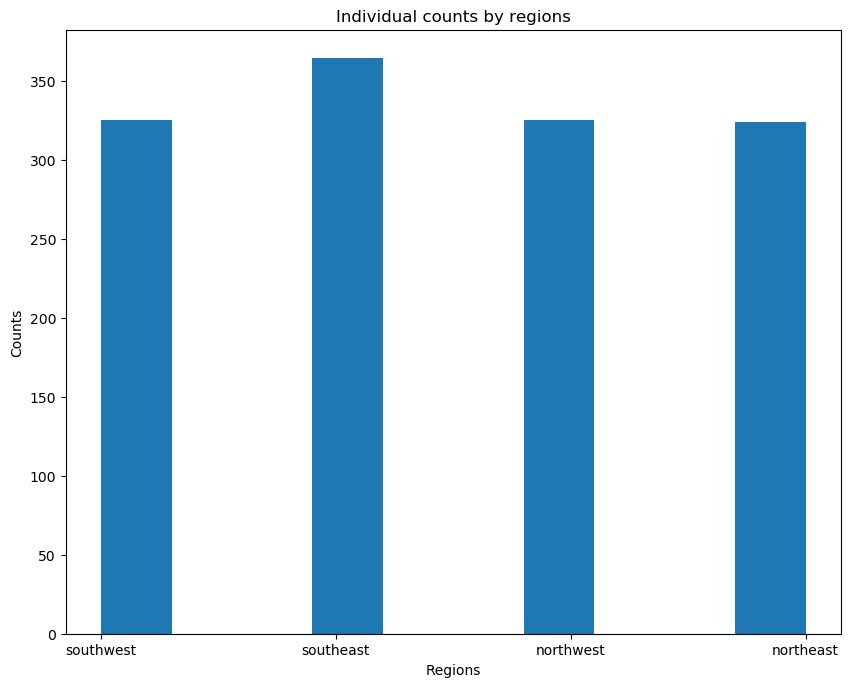

In [233]:
# Histogram showing the number of individuals in each region
plt.hist(regions)
# Add labels and title
plt.xlabel('Regions')
plt.ylabel('Counts')
plt.title('Individual counts by regions')
# Show plot
plt.show()

### Based on the above chart, we confirm that majority of the individuals from our insurance records are from the Southeast region.


# Figure 3. Showing the relation between AGES and Insurance charges

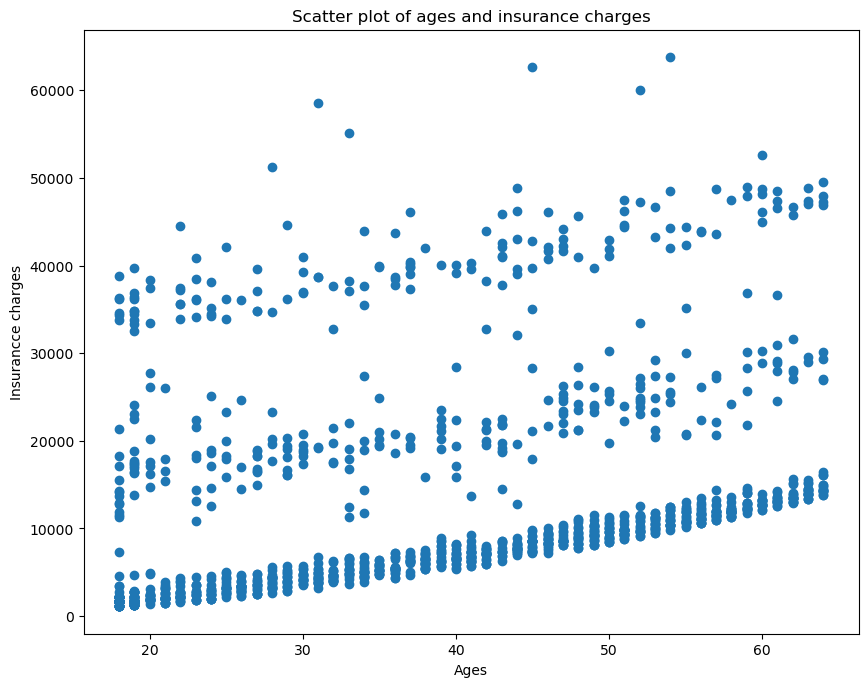

In [234]:
# create scatter plot between ages and charges
plt.scatter(ages, insurance_charges)

# add labels and title
plt.xlabel('Ages')
plt.ylabel('Insurancce charges')
plt.title('Scatter plot of ages and insurance charges')

# display the plot
plt.show()

### The presented plot depicts the relation between age and insurance charges. Our findings indicate that a positive correlation exists between these two variables, as an increase in age is accompanied by a rise in insurance charges. Evidence suggests that age plays a significant role in determining the magnitude of insurance charges.

# Figure 4. Showing the relation between BMI and Insurance charges

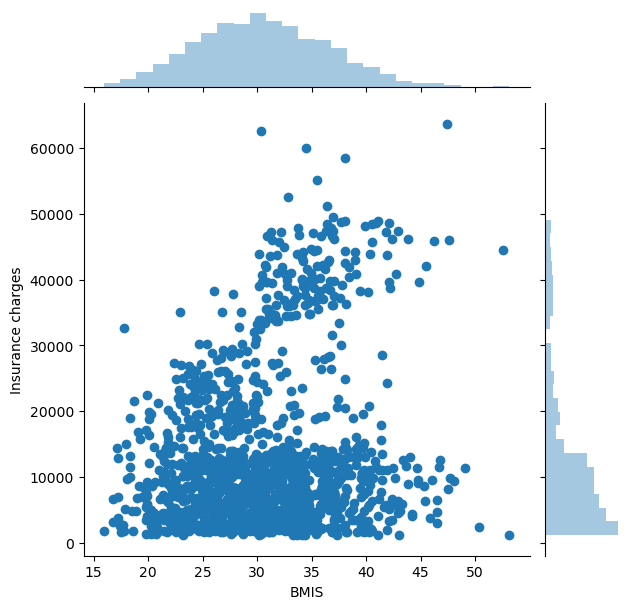

In [235]:
joint_plot= sns.jointplot(bmis, insurance_charges)
# add labels and title
joint_plot.set_axis_labels("BMIS", "Insurance charges")
# set title
#joint_plot.ax_joint.set_title("Scatter plot of BMIS and insurance charges", y=-0.01)
# display the plot
plt.show()

### In Figure 4, we can observe the relationship between BMIs and insurance charges. The analysis reveals a distinct positive correlation between BMI and medical expenses, suggesting that individuals with higher BMI values appear to have higher insurance charges. This observation is reflected in the figure as the data points exhibit a general positive slope. Notably, the data between BMIs of 12 and 40 is widely dispersed and corresponds to insurance charges < 15,000. Moreover, at higher insurance charges, BMI values appear to be positively correlated with the charges, indicating a strong positive slope. In conclusion, the findings imply that BMI can be a crucial factor in determining the medical expenses of individuals.

# Conclusion and Summary

### Based on our analysis, we discovered that the mean age of patients in the medical records is 39.21 years. The dataset comprises 676 male and 662 female patients, with the highest number of patients located in the southeast region (364 individuals). Furthermore, the average yearly insurance charges amount to $13,270.42. Among the patients, there were a total of 274 smokers and 1064 non-smokers, respectively. Additionally, the average BMI value for the patients is 30.66. Our findings suggest that age plays a significant role in determining the magnitude of insurance charges.